In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#!pip install fastai

In [ ]:
!pip install fastai==1.0.61

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 239 kB 34.5 MB/s 
     |████████████████████████████████| 355 kB 60.5 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=12768632831dc5fee5cc2df36a6dd049d7f0d8f046d147146589f6f622a5ef4d
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built nvidia-ml-py3
  Attempting uninstall: fastai
    Found existing installation: fastai 2.6.3
    Uninstalling fastai-2.6.3:
      Successfully uninstalled fastai-2.6.3


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/The_IQ_OTHNCCD_lung_cancer_dataset

 Bengin_cases			        Malignant_cases
'IQ-OTH_NCCD lung cancer dataset.txt'   Normal_cases


In [ ]:
input = '/content/drive/MyDrive/The_IQ_OTHNCCD_lung_cancer_dataset'

In [ ]:
import splitfolders

In [ ]:
!mkdir 'Bengin_dataset'

In [ ]:
!mkdir 'Malignant_dataset'

In [ ]:
!mkdir 'Normal_dataset'

In [ ]:
splitfolders.ratio(input, output = '/content/Bengin_dataset', seed=42, ratio=(.7, .2, .1), group_prefix = None)

Copying files: 1097 files [00:25, 43.11 files/s]


In [ ]:
import pandas as pd
import os
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

In [ ]:
input = '/content/drive/MyDrive/The_IQ_OTHNCCD_lung_cancer_dataset'

In [ ]:
from pathlib import Path
path = Path(input)
path.ls


<bound method <lambda> of PosixPath('/content/drive/MyDrive/The_IQ_OTHNCCD_lung_cancer_dataset')>

**TRAINING THE MODEL**

In [ ]:
from fastai.vision.transform import get_transforms
data = ImageDataBunch.from_folder(path, train = '.', valid_pct = 0.2, ds_tfms = get_transforms(), size = 234, num_workers=4).normalize(imagenet_stats)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:859.)
  re

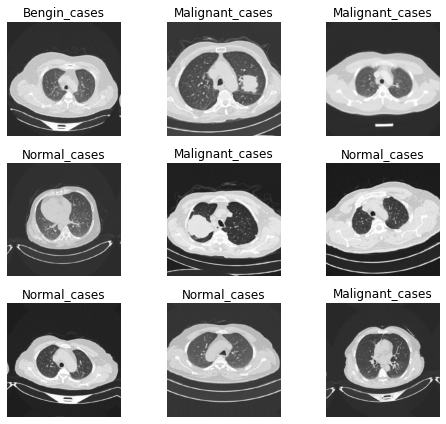

In [ ]:
data.show_batch(rows=3, figsize=(7,6))

In [ ]:
learn = cnn_learner(data, models.vgg16_bn,metrics=[accuracy,error_rate,Precision(),Recall(),FBeta()],model_dir = Path("/content/drive/My Drive/model"),path = Path("."))

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/hub/checkpoints/vgg16_bn-6c64b313.pth


  0%|          | 0.00/528M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


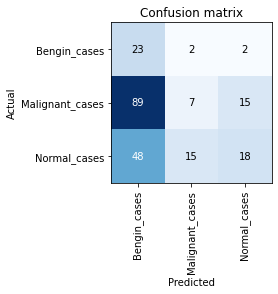

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

None


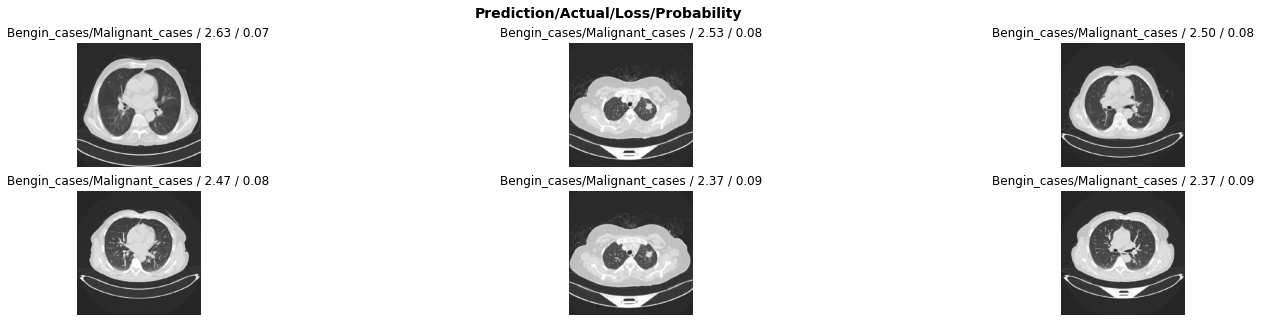

In [ ]:
campared_data = interp.plot_top_losses(6, figsize = (25,5))
print(campared_data)

In [ ]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time
0,1.035337,0.522513,0.767123,0.232877,0.696162,0.718274,0.694728,00:24
1,0.702091,0.310275,0.867580,0.132420,0.768822,0.701813,0.714264,00:24
2,0.558811,0.298213,0.890411,0.109589,0.830221,0.790457,0.798102,00:24


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/fastai/metrics.py:191: UserWarning: average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.
  warn("average=`binary` was selected for a non binary case. Value for average has now been set to `macro` instead.")


In [ ]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,error_rate,precision,recall,f_beta,time


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:490: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
learn.lr_find()

learn.recorder.plot(suggestions=True)



In [ ]:
learn.unfreeze()
learn.fit_one_cycle(3,slice(1e-5,1e-4))
